# 第十一次作业

## Short corridor with switched actions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def true_value(p):
    return (2 * p - 4) / (p * (1 - p))

In [3]:
class ShortCorridor:
    def __init__(self):
        self.reset()

    def reset(self):
        self.state = 0

    def step(self, go_right):
        if self.state == 0 or self.state == 2:
            if go_right:
                self.state += 1
            else:
                self.state = max(0, self.state - 1)
        else:
            if go_right:
                self.state -= 1
            else:
                self.state += 1

        if self.state == 3:
            # terminal state
            return 0, True
        else:
            return -1, False

In [4]:
def softmax(x):
    t = np.exp(x - np.max(x))
    return t / np.sum(t)

In [5]:
def trial(num_episodes, agent_generator):
    env = ShortCorridor()
    agent = agent_generator()

    rewards = np.zeros(num_episodes)
    for episode_idx in range(num_episodes):
        rewards_sum = 0
        reward = None
        env.reset()

        while True:
            go_right = agent.choose_action(reward)
            reward, episode_end = env.step(go_right)
            rewards_sum += reward

            if episode_end:
                agent.episode_end(reward)
                break

        rewards[episode_idx] = rewards_sum

    return rewards


In [6]:
def show():
    epsilon = 0.05
    fig, ax = plt.subplots(1, 1)

    # Plot a graph
    p = np.linspace(0.01, 0.99, 100)
    y = true_value(p)
    ax.plot(p, y, color='red')

    # Find a maximum point, can also be done analytically by taking a derivative
    imax = np.argmax(y)
    pmax = p[imax]
    ymax = y[imax]
    ax.plot(pmax, ymax, color='green', marker="*", label="optimal point: f({0:.2f}) = {1:.2f}".format(pmax, ymax))

    # Plot points of two epsilon-greedy policies
    ax.plot(epsilon, true_value(epsilon), color='magenta', marker="o", label="epsilon-greedy left")
    ax.plot(1 - epsilon, true_value(1 - epsilon), color='blue', marker="o", label="epsilon-greedy right")

    ax.set_ylabel("Value of the first state")
    ax.set_xlabel("Probability of the action 'right'")
    ax.set_title("Short corridor with switched actions")
    ax.set_ylim(ymin=-105.0, ymax=5)
    ax.legend()

    plt.show()
    plt.close()

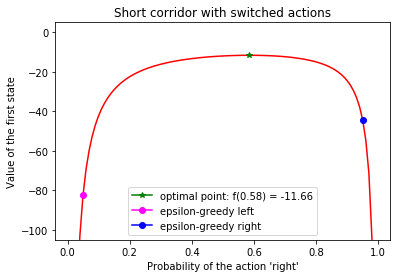

In [7]:
show()